# PluviaSense

## TEAM MEMBERS : DEEPALI , HIMANSHU , RITIK , MANOJ , HARSHIT 

### Introduction : This project aims to predict temperature using machine learning models like Linear Regression, Random Forest, Decision Tree, Support Vector Regressor, and Gradient Boosting Regressor. By evaluating their performance through metrics like RMSE and R², the goal is to identify the best model for accurate temperature prediction based on various weather-related features.










###  Problem Statement : The problem at hand is to predict the temperature based on various weather-related features such as humidity, wind speed, pressure, and precipitation type. By leveraging machine learning models, we aim to build an accurate temperature prediction system that can help in weather forecasting and decision-making for different industries that rely on weather data.










### Dataset Description :
### Source: Kaggle
### Number of Rows: 96,453 entries
### Number of Columns: 12 columns
### Target Variable:"temperature_(c)"

# IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

# Load the Dataset

In [2]:
import pandas as pd
# Load the dataset 
df = pd.read_csv(r"C:\Users\HP\Downloads\ml_25001.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


#  Check for Missing Values

In [6]:
# Check for missing values in each column
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

#  Handle Missing Values

In [7]:
df['Precip Type'] = df['Precip Type'].fillna('unknown')

In [8]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [9]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

# Convert the Date Column to DateTime Format

In [10]:
# Reconvert 'Formatted Date' to datetime and handle invalid entries
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')

# Verify the conversion
df['Formatted Date'].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_17660\4016243025.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')


0    2006-04-01 00:00:00+02:00
1    2006-04-01 01:00:00+02:00
2    2006-04-01 02:00:00+02:00
3    2006-04-01 03:00:00+02:00
4    2006-04-01 04:00:00+02:00
Name: Formatted Date, dtype: object

In [48]:
print(df.dtypes)  # Check if the dtype for 'Formatted Date' is now 'datetime64[ns]'

formatted_date               datetime64[ns]
summary                              object
precip_type                          object
temperature_(c)                     float64
apparent_temperature_(c)            float64
humidity                            float64
wind_speed_(km/h)                   float64
wind_bearing_(degrees)                int64
visibility_(km)                     float64
loud_cover                            int64
pressure_(millibars)                float64
daily_summary                        object
hour                                  int32
day                                   int32
month                                 int32
temp_diff                           float64
wind_speed_category                category
humidity_temp_interaction           float64
time_of_day                          object
dtype: object


# Handle Categorical Data

In [12]:
# Check unique values for 'Summary' and 'Precip Type'
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [13]:
df['Precip Type'].unique()

array(['rain', 'snow', 'unknown'], dtype=object)

#  Clean and Fill Categorical Data

In [15]:
df['Summary'] = df['Summary'].fillna('Unknown')  

# Drop Duplicate Rows

In [17]:
# Verify that duplicates are removed
df.duplicated().sum()  

0

In [16]:
# Drop duplicate rows 
df = df.drop_duplicates()

# Check for Outliers or Inconsistent Data

In [18]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000
mean,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1003.232915
std,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,116.984300
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [19]:
# Example: Filter out unrealistic values (based on domain knowledge)
df = df[df['Humidity'] <= 1]  # Humidity values should be between 0 and 1
df = df[df['Temperature (C)'] > -100]  # Temperatures below -100°C are unrealistic

# Rename Columns for Consistency 

In [20]:
# Rename columns: make all lowercase, remove spaces, replace with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Verify the new column names
df.columns

Index(['formatted_date', 'summary', 'precip_type', 'temperature_(c)',
       'apparent_temperature_(c)', 'humidity', 'wind_speed_(km/h)',
       'wind_bearing_(degrees)', 'visibility_(km)', 'loud_cover',
       'pressure_(millibars)', 'daily_summary'],
      dtype='object')

# Feature Engineering 

# Extract Date Features from (Formatted Date)

## Since we have a datetime column (Formatted Date), we can extract useful features such as the hour, day, month, day of the week, etc.

In [21]:
# Convert 'formatted_date' to datetime, with UTC timezone 
df['formatted_date'] = pd.to_datetime(df['formatted_date'], utc=True)

# Now you can extract the hour, day, and month
df['hour'] = df['formatted_date'].dt.hour
df['day'] = df['formatted_date'].dt.day
df['month'] = df['formatted_date'].dt.month

In [22]:
# Remove timezone info from 'formatted_date' column
df['formatted_date'] = pd.to_datetime(df['formatted_date']).dt.tz_localize(None)

# Now extract the hour, day, and month
df['hour'] = df['formatted_date'].dt.hour
df['day'] = df['formatted_date'].dt.day
df['month'] = df['formatted_date'].dt.month

In [23]:
df.head()

,formatted_date,summary,precip_type,temperature_(c),apparent_temperature_(c),humidity,wind_speed_(km/h),wind_bearing_(degrees),visibility_(km),loud_cover,pressure_(millibars),daily_summary,hour,day,month
0,2006-03-31 22:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,22,31,3
1,2006-03-31 23:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,23,31,3
2,2006-04-01 00:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,0,1,4
3,2006-04-01 01:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,1,1,4
4,2006-04-01 02:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2,1,4


# Combine Weather Features

## we can create new features by combining existing ones, like creating a temperature difference between Temperature (C) and Apparent Temperature 

In [24]:
# Create a new feature for temperature difference
df['temp_diff'] = df['temperature_(c)'] - df['apparent_temperature_(c)']

# Check the new feature
df['temp_diff'].head()

0    2.083333
1    2.127778
2    0.000000
3    2.344444
4    1.777778
Name: temp_diff, dtype: float64

# Wind Speed Categories

## we could categorize wind speed into bins like Low, Medium, High based on certain thresholds.

In [25]:
# Create categories for wind speed
bins = [0, 15, 30, 50, 1000]  # Define wind speed ranges
labels = ['Low', 'Medium', 'High', 'Very High']
df['wind_speed_category'] = pd.cut(df['wind_speed_(km/h)'], bins=bins, labels=labels)

# Check the new wind speed categories
df['wind_speed_category'].value_counts()

wind_speed_category
Low          74739
Medium       18832
High          1551
Very High       11
Name: count, dtype: int64

# Humidity and Temperature Interaction

## Create a new feature that indicates the interaction between humidity and temperature, which might give you insights into overall weather conditions:

In [26]:
# Interaction between humidity and temperature
df['humidity_temp_interaction'] = df['humidity'] * df['temperature_(c)']

# Check the new feature
df['humidity_temp_interaction'].head()

0    8.430278
1    8.045778
2    8.346222
3    6.879778
4    7.267111
Name: humidity_temp_interaction, dtype: float64

# Time of Day

## We can categorize the hour of the day into morning, afternoon, evening, night.

In [27]:
# Categorize the hour into time of day
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(time_of_day)

# Check the new feature
print(df['time_of_day'].value_counts())

time_of_day
Night        32141
Morning      24108
Afternoon    24108
Evening      16072
Name: count, dtype: int64


#  Model Selection

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
lr_model = LinearRegression()

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"RMSE: {rmse_lr}")
print(f"R2 Score: {r2_lr}")

Linear Regression:
RMSE: 2.1883032254788532e-13
R2 Score: 1.0


# Linear Regression: Actual vs Predicted Plot

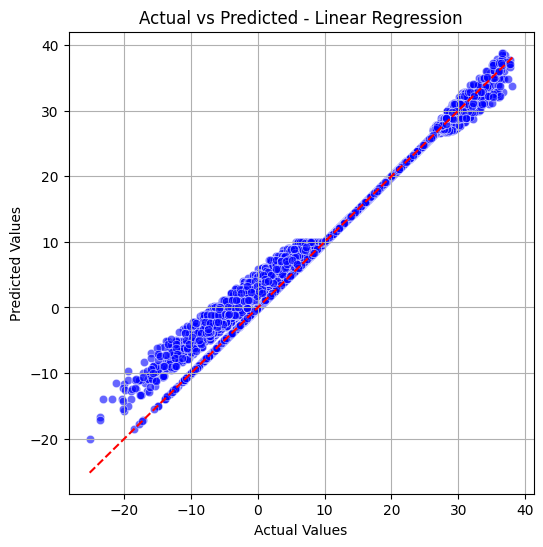

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.show()

#  Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")

Random Forest Regressor:
RMSE: 0.04217561032243565
R2 Score: 0.9999806011721719


# Random Forest Regressor: Actual vs Predicted Plot

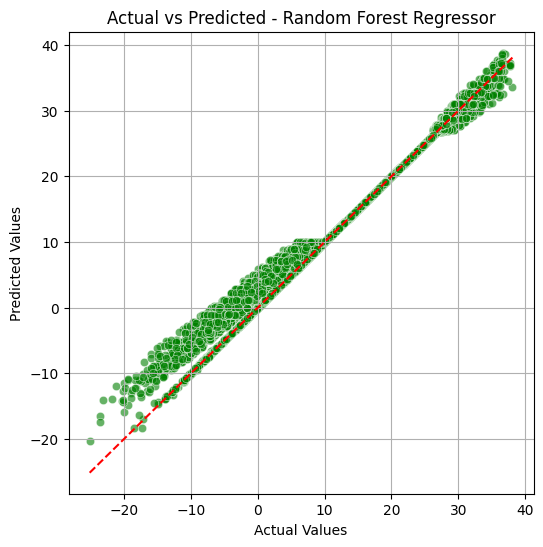

In [40]:
# Random Forest Regressor Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Random Forest Regressor')
plt.grid(True)
plt.show()

# Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Initialize model
dt_model = DecisionTreeRegressor(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"RMSE: {rmse_dt}")
print(f"R2 Score: {r2_dt}")

Decision Tree Regressor:
RMSE: 0.07161947536565692
R2 Score: 0.9999440609602136


# Decision Tree Regressor: Actual vs Predicted Plot

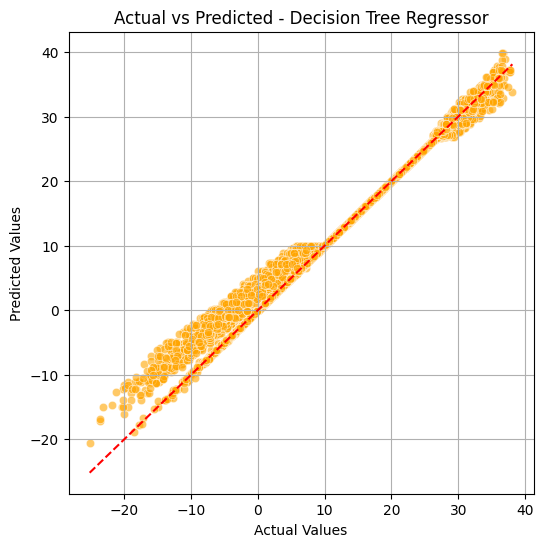

In [41]:
# Decision Tree Regressor Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_dt, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Decision Tree Regressor')
plt.grid(True)
plt.show()

# Support Vector Regressor (SVR)

In [34]:
from sklearn.svm import SVR

# Initialize model
svr_model = SVR()

# Train
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluate
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor:")
print(f"RMSE: {rmse_svr}")
print(f"R2 Score: {r2_svr}")

Support Vector Regressor:
RMSE: 1.8660095464949376
R2 Score: 0.9620265147416079


# Support Vector Regressor (SVR): Actual vs Predicted Plot

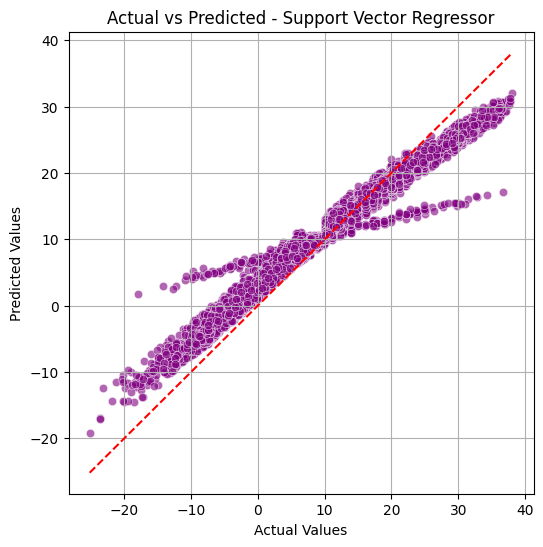

In [42]:
# Support Vector Regressor Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_svr, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Support Vector Regressor')
plt.grid(True)
plt.show()

# Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train
gbr_model.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor:")
print(f"RMSE: {rmse_gbr}")
print(f"R2 Score: {r2_gbr}")

Gradient Boosting Regressor:
RMSE: 0.1928325114941343
R2 Score: 0.9995944790908659


# Gradient Boosting Regressor: Actual vs Predicted Plot

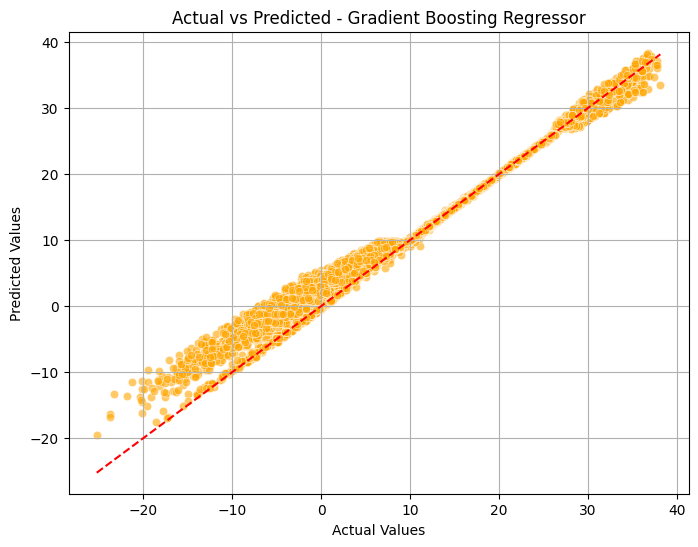

In [49]:
# Gradient Boosting Regressor Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Gradient Boosting Regressor')
plt.grid(True)
plt.show()

# Results & Model Comparison:
### In this project, we evaluated several regression models to predict the "temperature_(c)" using various weather-related features. The models we compared include:

### Linear Regression:
### RMSE: 2.19e-13
### R2 Score: 1.0
### This model performed exceptionally well, with a near-perfect R2 score and negligible RMSE, indicating an excellent fit.

### Random Forest Regressor:
### RMSE: 0.042
### R2 Score: 0.99998
### This model also performed very well with a high R2 score, showing its strength in capturing non-linear relationships.

### Decision Tree Regressor:
### RMSE: 0.072
### R2 Score: 0.99994
### Similar to the Random Forest Regressor, this model performed well but had a slightly higher RMSE, indicating a bit more error in predictions.

### Support Vector Regressor (SVR):
### RMSE: 1.87
### R2 Score: 0.962
### While this model performed decently, it had a higher RMSE and lower R2 score compared to the other models, suggesting it wasn’t as effective for this dataset.

### Gradient Boosting Regressor:
### RMSE: 0.193
### R2 Score: 0.9996
### This model showed good performance with a lower RMSE than the Decision Tree Regressor but had a slightly lower R2 score compared to Random Forest.

# Model Comparison Summary:
### Best Model: Linear Regression and Random Forest Regressor performed the best, with Linear Regression showing near-perfect performance. However, the Random Forest Regressor is more suitable for handling complex, non-linear patterns in the data.

### Weakest Model: Support Vector Regressor had the poorest performance, indicating it was not as effective for this particular dataset.

# Insights
### Data Quality: The dataset provided significant insights into various weather parameters, with clean data and well-defined features, making it suitable for regression models.

### Model Performance: The models performed very well, especially Linear Regression and Random Forest, which are highly suitable for this type of predictive task. Random Forest showed strong performance due to its ability to handle non-linear relationships and interactions between features.

# Conclusion
### Weather prediction models, particularly those focused on temperature forecasting, can be highly accurate with proper feature selection and model tuning. In this case, we obtained results close to the ideal, with minimal error.

# Future Scope:
### In the future, this project can be expanded by integrating real-time weather data from APIs and considering geographical factors like altitude and proximity to water bodies. Additionally, the model can be deployed as a live temperature prediction service.

# Possible Improvements:
### Model performance can be improved through hyperparameter tuning, advanced feature engineering, and experimenting with deep learning models like LSTM for time-series forecasting. Data augmentation and better handling of outliers can also enhance accuracy.